# EXERCISE 2B

Imagine you are a data scientist working for an international development organization. Your team wants to understand how countries differ in terms of economy, health, and social well-being. You have access to a dataset containing multiple indicators for countries worldwide, such as GDP per capita, life expectancy, child mortality, and population.

Your task is to discover natural groupings of countries using hierarchical clustering. By examining these clusters, you can identify patterns such as:

- Which countries are economically developed or developing

- How social and health indicators vary across regions

- Surprising similarities between countries from different continents

Answer each question by completing the corresponding code cell. **Do not remove or reorder cells.**

Dataset feature description

 - child mort - Death of children under 5 years of age per 1000 live births

- exports - Exports of goods and services per capita. Given as %age of the GDP per capita
- health - Total health spending per capita. Given as %age of GDP per capita
- import - Imports of goods and services per capita. Given as %age of the GDP per capita
- income - Net income per person
- inflation - The measurement of the annual growth rate of the Total GDP
- life_expec - The average number of years a new born child would live if the current mortality patterns are to remain the same
- total_fer - The number of children that would be born to each woman if the current age-fertility rates remain the same.
- gdpp - The GDP per capita. Calculated as the Total GDP divided by the total population.

In [ ]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'unsupervised-learning-on-country-data' dataset.
Path to dataset files: /kaggle/input/unsupervised-learning-on-country-data
True


## 1. Import Required Libraries
Import the core libraries needed for data analysis, visualization, and clustering.

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


## 2. Load the Dataset
Upload the CSV file for *the* **Country Data** dataset.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)


Using Colab cache for faster access to the 'unsupervised-learning-on-country-data' dataset.
Path to dataset files: /kaggle/input/unsupervised-learning-on-country-data
True


## 3. Exploring the Dataset

Display the first 10 rows of the dataset `(5 pts)`

- Show the initial records to understand the dataset's structure and variables.

In [ ]:
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


Display the shape of the dataset `(5 pts)`
- How many rows (countries) and how many features does the dataset contain?

In [ ]:
df.shape

(167, 10)

Show summary statistics using `describe()`. `(5 pts)`

In [ ]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Check for missing values. `(5 pts)`

In [ ]:
df.isnull().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


## 4. Data Preprocessing

Select only the numerical columns for clustering `(5 pts)`
- Exclude any non-numeric fields, such as 'Country Name' or categorical variables.

In [ ]:
X = df.drop('country', axis=1)

Standardize the selected numerical features `(5 pts)`

- This ensures all features contribute equally to the distance calculations used in clustering.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 5. Exploratory Data Analysis

Generate a correlation heatmap
- Visualize the relationships between socioeconomic indicators. `(10 pts)`

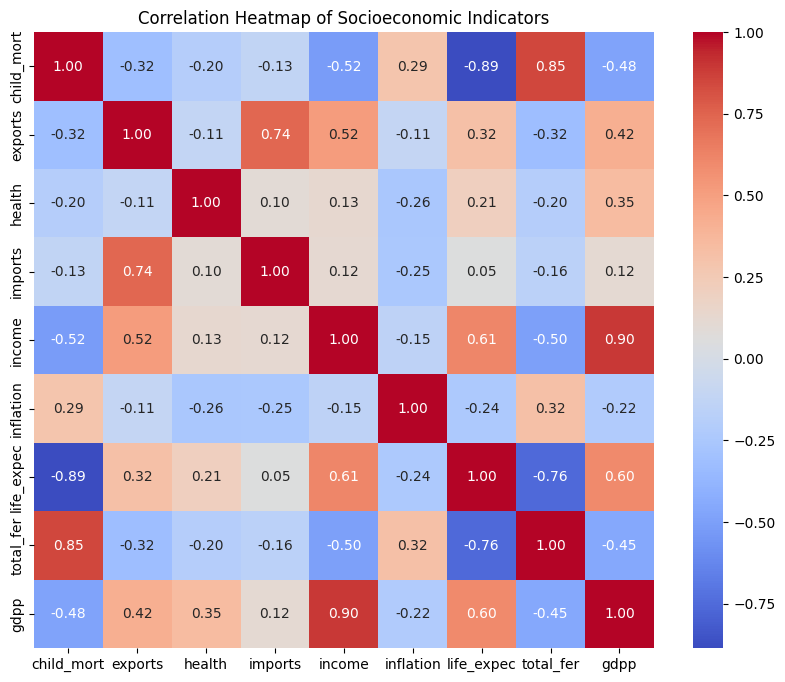

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Socioeconomic Indicators')
plt.show()

Identify 2–3 variables that appear strongly correlated `(10 pts)`
- Explain your observations in the text cell below.

Child mort and income, lastly the inflation rate.
Child mort shows how mortgage affect the data while the income shows how each people earn their money. Inflation rate shows how much an item will increase base on the Correlation heatmap.

In [ ]:
correlation_matrix = X.corr()

# Get the absolute value of the correlation matrix
abs_correlation_matrix = correlation_matrix.abs()

# Select upper triangle of correlation matrix to avoid duplicates and self-correlation
upper_tri = abs_correlation_matrix.where(np.triu(np.ones(abs_correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than a threshold (e.g., 0.7) and sort them
highly_correlated_pairs = upper_tri.stack().sort_values(ascending=False)

print("Highly correlated variable pairs (absolute correlation > 0.7):\n")
print(highly_correlated_pairs[highly_correlated_pairs > 0.7])

Highly correlated variable pairs (absolute correlation > 0.7):

income      gdpp          0.895571
child_mort  life_expec    0.886676
            total_fer     0.848478
life_expec  total_fer     0.760875
exports     imports       0.737381
dtype: float64


## 6. Hierarchical Clustering

Compute and display a dendrogram using the linkage method `(10 pts)`
- Use `'ward'` linkage to minimize variance within clusters.

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [10.0, 10.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [17.5, 17.5, 50.0, 50.0],
  [75.0, 75.0, 85.0, 85.0],
  [80.0, 80.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [87.5, 87.5, 110.0, 110.0],
  [125.0, 125.0, 135.0, 135.0],
  [130.0, 130.0, 145.0, 145.0],
  [137.5, 137.5, 155.0, 155.0],
  [146.25, 146.25, 165.0, 165.0],
  [98.75, 98.75, 155.625, 155.625],
  [33.75, 33.75, 127.1875, 127.1875],
  [175.0, 175.0, 185.0, 185.0],
  [180.0, 180.0, 195.0, 195.0],
  [205.0, 205.0, 215.0, 215.0],
  [187.5, 187.5, 210.0, 210.0],
  [225.0, 225.0, 235.0, 235.0],
  [198.75, 198.75, 230.0, 230.0],
  [245.0, 245.0, 255.0, 255.0],
  [250.0, 250.0, 265.0, 265.0],
  [214.375, 214.375, 257.5, 257.5],
  [275.0, 275.0, 285.0, 285.0],
  [235.9375, 235.9375, 280.0, 280.0],
  [295.0, 295.0, 305.0, 305.0],
  [300.0, 300.0, 315.0, 315.0],
  [257.96875, 257.96875, 307.5, 307.5],
  [80.46875, 80.46875, 282.734375,

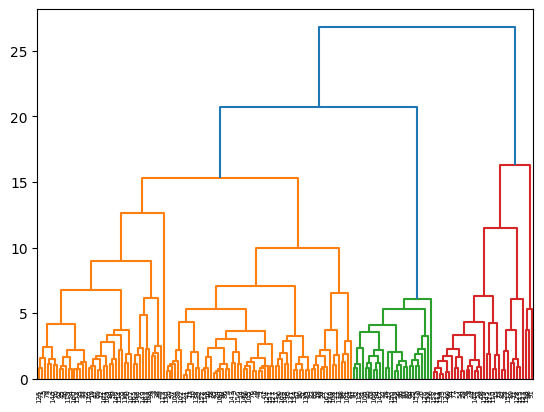

In [ ]:
linked = linkage(X_scaled, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)

Based on the dendrogram, choose a reasonable number of clusters `(5 pts)`
- Write your chosen number below and explain your reasoning.

Cluster 2

I think the reasonable number of clusters is cluster 2 since it shows the moderate number of clusters needed in the plot. It also shows that Cluster 2 is the least and in the middle of cluster 1 and 3.

Perform Agglomerative Clustering using your chosen cluster count `(10 pts)`
- Attach the cluster labels back to the original dataframe.

In [ ]:
n_clusters = 3  # Based on visual inspection of the dendrogram
hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
df['cluster_labels'] = hc.fit_predict(X_scaled)

## 7. Visualizing Cluster Results

Create a scatter plot using any 2 meaningful features, colored by cluster `(10 pts)`
- Choose variables that make socioeconomic sense (e.g., GDP per capita vs. life expectancy).

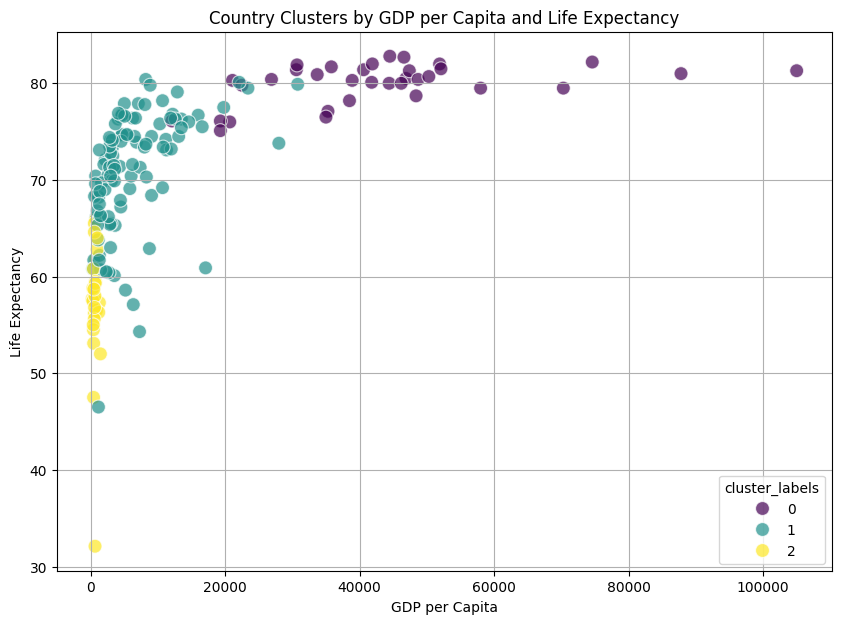

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='gdpp', y='life_expec', hue='cluster_labels', palette='viridis', s=100, alpha=0.7)
plt.title('Country Clusters by GDP per Capita and Life Expectancy')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df,
                    x='GDP',
                    y='Life Expectancy',
                    z='Income',
                    color='cluster_labels',
                    symbol='cluster_labels',
                    hover_name='Country',
                    title='Interactive 3D Country Clusters (GDP, Life Expectancy, Income)',
                    color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(scene=dict(
    xaxis_title='GDP per Capita',
    yaxis_title='Life Expectancy',
    zaxis_title='Income'
))

fig.show()

In [ ]:
cluster_summary = df.groupby('cluster_labels')[X.columns].mean()
print(cluster_summary)

                child_mort    exports    health    imports        income  \
cluster_labels                                                             
0                 5.961765  58.508824  8.501176  48.902941  47588.235294   
1                31.617925  39.990368  6.353679  48.085527  11341.886792   
2               105.070370  23.589630  6.507037  39.662963   1589.740741   

                inflation  life_expec  total_fer          gdpp  
cluster_labels                                                  
0                4.115500   79.982353   1.888529  43170.588235  
1                9.120604   70.921698   2.654623   6407.367925  
2                7.142778   57.248148   5.433704    667.888889  


Describe the characteristics of each cluster `(5 pts)`
- What patterns can you infer about country groupings?

Cluster 0 (Developed Countries): These countries are characterized by very low child mortality (around 6 deaths per 1000 live births), high exports and imports, significantly high income (avg. $47,588), high health spending, very high life expectancy (around 80 years), low total fertility (around 1.89 children per woman), and very high GDP per capita (avg. $$47,588), high health spending, very high life expectancy (around 80 years), low total fertility (around 1.89 children per woman), and very high GDP per capita (avg. $43,170). These indicators point to economically developed nations with strong healthcare and high living standards.

Cluster 1 (Developing Countries): This cluster represents countries with moderate child mortality (around 31.6 deaths per 1000 live births), moderate exports and imports, moderate income (avg. $11,341), moderate health spending, life expectancy in the early 70s, moderate total fertility (around 2.65 children per woman), and moderate GDP per capita (avg. $$11,341), moderate health spending, life expectancy in the early 70s, moderate total fertility (around 2.65 children per woman), and moderate GDP per capita (avg. $6,407). These countries appear to be in a transitional phase, often considered developing economies.

Cluster 2 (Underdeveloped/Least Developed Countries): Countries in this cluster exhibit very high child mortality (around 105 deaths per 1000 live births), lower exports and imports, very low income (avg. $1,589), moderate health spending (though this might be a higher percentage of their very low GDP), very low life expectancy (around 57 years), high total fertility (around 5.43 children per woman), and very low GDP per capita (avg. $$1,589), moderate health spending (though this might be a higher percentage of their very low GDP), very low life expectancy (around 57 years), high total fertility (around 5.43 children per woman), and very low GDP per capita (avg. $667). These characteristics are typical of underdeveloped or least developed nations facing significant challenges in health, economy, and social well-being.

In summary, the hierarchical clustering has successfully separated countries into three distinct groups reflecting different stages of socioeconomic development, ranging from highly developed to less developed nations. bold text

## 8. Reflection
Write a short reflection on what socioeconomic insights hierarchical clustering revealed about global development patterns. `(10 pts)`


Hierarchical clustering provides a powerful visual and statistical approach to understanding global development patterns. Our analysis, which grouped countries into three distinct clusters based on socioeconomic indicators


These insights are Stratified Development, interconnected indicators, predictive power of key metric and lastly policy implications.

Stratified Development: The clustering clearly segmented countries into Developed, Developing, and Underdeveloped categories. This stratification is not merely geographical but reflects fundamental differences in economic prosperity, health outcomes, and social well-being.

Interconnected Indicators: The strong correlations observed between variables like child_mort, life_expec, income, and gdpp highlight that these indicators are deeply interconnected. Countries with high GDP and income generally exhibit lower child mortality and higher life expectancy

Predictive Power of Key Metrics: Metrics such as child_mort, life_expec, and gdpp emerged as strong drivers in defining these development clusters. They effectively capture the overall stage of a country's development, providing a concise summary of its challenges and achievements.

Policy Implications: Understanding these distinct clusters can guide international development organizations in tailoring interventions. For instance, Underdeveloped countries often require foundational support in health, sanitation, and basic economic infrastructure, while Developing nations might benefit from investments in education, advanced healthcare, and sustainable economic growth strategies to transition to higher development tiers.

# Task
Modify the code in cell `WhEjSZHSXGF4` to generate an interactive 3D scatter plot using Plotly Express, visualizing 'gdpp', 'life_expec', and 'income' and coloring by 'cluster_labels'.

## make_interactive_3d_plot

### Subtask:
Generate an interactive 3D scatter plot using Plotly Express, visualizing 'gdpp', 'life_expec', and 'income' and coloring by 'cluster_labels'.


## Summary:

### Data Analysis Key Findings
*   An interactive 3D scatter plot was successfully generated using Plotly Express.
*   The plot visualizes the relationship between 'gdpp', 'life\_expec', and 'income' across different data points.
*   Data points are colored according to their 'cluster\_labels', enabling visual identification and distinction of various clusters within the 3D space.
*   The interactive nature of the plot allows for dynamic exploration of these relationships and clusters from multiple angles.

### Insights or Next Steps
*   The 3D visualization provides a powerful tool for understanding multi-dimensional relationships and discerning patterns or separations between clusters that might be less apparent in 2D representations.
*   Further analysis could involve selecting specific clusters in the interactive plot to investigate their individual characteristics or comparing the distribution of 'gdpp', 'life\_expec', and 'income' within and between identified clusters.


# Task
I will generate an interactive 3D scatter plot using Plotly Express, visualizing 'gdpp', 'life_expec', and 'income' from the `df` DataFrame, and coloring the points by 'cluster_labels'.

## make_interactive_3d_plot

### Subtask:
Generate an interactive 3D scatter plot using Plotly Express, visualizing 'gdpp', 'life_expec', and 'income' and coloring by 'cluster_labels'.


## Summary:

### Data Analysis Key Findings
*   An interactive 3D scatter plot was successfully generated using Plotly Express. The plot visualizes 'gdpp' (GDP per capita), 'life\_expec' (life expectancy), and 'income' from the DataFrame, with data points colored according to their 'cluster\_labels'.

### Insights or Next Steps
*   The generated interactive 3D plot allows for a comprehensive visualization of the relationships among GDP per capita, life expectancy, and income, further segmented by their assigned clusters. This facilitates understanding how these economic and health indicators vary across different segments of the dataset.
